# Hoja 3
## Carlos Farouk Abdala
## Tomas Candelo 
## Gabriel Jimenez 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\tomas\AppData\Local\Temp\ipykernel_38896\2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Exercise 1
### Exercise 1.1

In [4]:
# matrix without function

D = np.array([[10, 12], [7, 8], [5, 4]])
D_covariance = np.cov(D, rowvar=False, bias=True)
eigenvalues, eigenvectors = np.linalg.eig(D_covariance)
print("eigenvalues of D_covariance \n", eigenvalues, "\n")
print("eigenvectors of D_covariance \n", eigenvectors, "\n")

# matrix with function
def transformation (x):
    return 2*x + 5
function = np.vectorize(transformation)
trans_D = function(D)    
trans_D_covariance = np.cov(trans_D, rowvar=False, bias=True)
eigenvalues_trans, eigenvectors_trnas = np.linalg.eig(trans_D_covariance)
print("eigenvalues of trans_D_covariance \n", eigenvalues_trans, "\n")
print("eigenvectors of trans_D_covariance \n", eigenvectors_trnas)

eigenvalues of D_covariance 
 [ 0.03990796 14.84898093] 

eigenvectors of D_covariance 
 [[-0.84710349 -0.53142795]
 [ 0.53142795 -0.84710349]] 

eigenvalues of trans_D_covariance 
 [ 0.15963186 59.3959237 ] 

eigenvectors of trans_D_covariance 
 [[-0.84710349 -0.53142795]
 [ 0.53142795 -0.84710349]]


### Exercise 1.2

En este caso buscamos demostrar que los componentes principales, vectores propios de la matriz de correlación, es igual en la matriz original y la matriz transformada por una función afin, primero decleremos los siguientes valores:
D ------> La matriz sin transformar  
DTrans -------> La matriz tranformada por una transformación  
covarianza --------> matriz de covarianza de D  
covarianza_transformada --------> matriz de covarianza de DT  
vector propio ------> vectores propios de la matriz de correlación  

Una vez definido esto es necesario centrar los datos de la matriz para obtener la covarianza de esta la cual esta definida por la siguiente ecuación
$$ ecuación 1: covarianzaTranformada = \frac{1}{n} \sum_{i=1}^{n} (D_centradoT * D_centrado) $$
Donde D_centradoT son los datos centralizados transpuestos y D_centrado son los datos centrados normales y se expresan como 
$$ euación 2: D_centrado = D - media $$

Esta ecuación de la covarianza la vamos a asemejar como la de correlación ya que estas dos matrices son semejantes en este caso  

De la hoja anterior podemos de igual manera decir que la media transformada esta determinada por la siguiente ecuación
$$ ecuación 3: media-tranfrormada = a*media + b $$

Entonces si aplicamos la matriz transformada a la ecuación 1 y los valores centrados los cambiamos por la ecuación 2 tendriamos que
$$  Correlación-Transformada = \frac{1}{n} * (DTtrans - mediaTransformadaT)T * (DT - mediaTransformadaT) $$

Ahora si cambiamos los valores de la ecuacíon por la formula que equivale su tranformación seria

$$  \frac{1}{n} * (a*D + b - a*media + b)T * (a*D + b - a*media + b) $$

simplificamos y obtenemos 

$$  \frac{1}{n} * DT*AT*AD - \frac{1}{n} * DT*AT*A*media - \frac{1}{n} mediaT * AT * AD - \frac{1}{n} mediaT*AT * A*media $$ 

Dado que A es una matriz de valores escalares A*AT tambien es una matriz escalar y ya que la definición dada en la hoja nos dice que la matriz de covarianza y correlación son iguales porque sus valores son igual a 1 la expersión anterior puede ser simplificada a: 

$$  \frac{1}{n} * DT*D - \frac{1}{n} * DT*media - \frac{1}{n} mediaT*D - \frac{1}{n} mediaT*media $$

simplificando nuevamente obtenemos que 

$$  \frac{1}{n} * DT*D - mediaT * media$$

lo cual es semejante a decir que la correlación tranformada es igual a 1/n * Σ siendo sigma la matriz de covarianza original  

Si todo esto lo aplicamos a la formula Σ*v = α*v donde v son nuestros vectores propios y α es el valor propio, podemos concluir que la matriz de correlación, despues de transformarla, esta dada como una versión escalar de la matriz de covarianza original y las componentes principlaes (nuestros valores o vectores propios) estan relacionadas unicamente con la matriz de covarianza o de correlación, ya que estas son iguales entre si gracias a que sus varianzas equivalen a 1, por lo que estos componentes principales tampoco cambiaran, además cabe resaltar que α no cambia ni en la ecuación tranformada o sin tranformar, en otras palabras v'es el vector propio de la correlación de la matriz transformada que tiene como valor propio a α el cual es el mismo que tiene el vector propio v de la correlación de la matriz original


## Exercise 2
### Exercise 2.1

In [123]:
def PCA (D,red):
    u= np.array([])
    mean_of_D= np.mean(D, axis=0)
    center_D= D-mean_of_D
    cov_D = np.cov(center_D, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eig(cov_D)
    eigenvalues= abs(eigenvalues)
    order_indices = np.argsort(eigenvalues)[::-1].tolist()

    sorted_eigenvalues = eigenvalues[order_indices]
    sorted_eigenvectors = eigenvectors[:, order_indices]
    total_variance=(np.sum(eigenvalues))
 
    if(0<=red and red<1):
        red_acum_variance=(total_variance*red)
        acum_variance=0
        r=0
        for index in range(len(sorted_eigenvalues)):
            r+=1
            acum_variance+=sorted_eigenvalues[index]
            if acum_variance > red_acum_variance:
                break
        if r!=0:
            u= sorted_eigenvectors[:,:r]
            D_resized = np.dot(center_D, u)
        else:
            return ("El valor de alpha solicitado es inválido para la matriz",0)
       
    if(red>=1 and int == type(red)):
        acum_variance= sum(sorted_eigenvalues[:red])
        u= sorted_eigenvectors[:,:red]
        D_resized = np.dot(center_D, u)

    ralative_variance= acum_variance/total_variance
    return (D_resized,acum_variance,ralative_variance)
 
 
xd=np.array([[4, 1, 0, 9, 8],
 [9, 9, 1, 6, 1],
 [4, 5, 3, 3, 5],
 [6, 2, 7, 3, 8],
 [5, 1, 0, 8, 1],
 [0, 4, 4, 6, 3],
 [3, 3, 7, 6, 3],
 [0, 6, 9, 3, 4],
 [4, 5, 0, 1, 6],
 [6, 5, 1, 3, 1]])
result_resized_matrix,x,y=PCA(xd,4)
print("Resized Matrix: \n",result_resized_matrix,"\n", x)

Resized Matrix: 
 [[-2.22383293  6.62077922 -0.9864382   0.03164106]
 [-5.55127862 -4.7594466   0.5427392   2.28080035]
 [ 0.55058985 -0.98729531 -1.77065664 -0.80993837]
 [ 3.68276669  1.36321497 -3.73620713  3.34999953]
 [-4.37500465  2.74874794  3.09709231  0.07380571]
 [ 2.10915442  0.84383508  2.99845749 -2.2964254 ]
 [ 3.03064114  0.41677691  2.57421906  1.72366106]
 [ 6.92241058 -2.45359706  1.51927006 -0.63565965]
 [-1.04675051 -0.9551932  -4.22672217 -3.08842427]
 [-3.09869596 -2.83782195 -0.01175398 -0.62946002]] 
 37.020205287113164


### Exercise 2.2

#### 2.2.a

In [136]:
# frames implementation
iris_frame_dowloaded = pd.read_csv("iris.csv")
filtered_iris_frame = iris_frame_dowloaded.loc[:, iris_frame_dowloaded.columns != "species"]
fabert_frame_dowloaded = pd.read_csv("fabert.csv")
filtered_fabert_frame = fabert_frame_dowloaded.drop(['class'],axis=1)
Amazon_frame_dowloaded = pd.read_csv("amazon.csv")
filtered_Amazon_frame = Amazon_frame_dowloaded.loc[:, Amazon_frame_dowloaded.columns != "Class"]
baseball_numeric_frame_dowloaded = pd.read_csv("baseball_numeric.csv")

In [117]:
def getStats(A):
    n = len(A) 
    m = len(A[0]) 

    mean = [sum(col) / n for col in zip(*A)]

    central_A = [[A[i][j] - mean[j] for j in range(m)] for i in range(n)]
    central_A2=np.array(central_A)

    cov = np.dot(central_A2.T, central_A2) / n

    std_dev = np.sqrt(np.diag(cov))
    corr = [[cov[j][k] / (std_dev[j] * std_dev[k]) for k in range(m)] for j in range(m)]
    
    return mean, cov, corr


In [8]:
import time

data = {"dataset": ["iris", "fabert", "amazon", "baseball numeric"], "time with getStats": [], "time with corcoef": []}


datasets = [filtered_iris_frame, filtered_fabert_frame, filtered_Amazon_frame, baseball_numeric_frame_dowloaded]
for dataset in datasets:
    start1 = time.time()
    data_np = dataset.to_numpy()
    getStats(data_np)
    end1 = time.time()
    excecuting_time_with_getStats = end1 - start1
    start2 = time.time()
    corr2 = np.corrcoef(dataset, rowvar=False, bias=True)
    end2 = time.time()
    excecuting_time_with_corcoef = end2 - start2
    data["time with getStats"].append(excecuting_time_with_getStats)
    data["time with corcoef"].append(excecuting_time_with_corcoef)

data_frame = pd.DataFrame(data)
print(data_frame)


C:\Users\tomas\AppData\Local\Temp\ipykernel_33804\3964515318.py:14: DeprecationWarning: bias and ddof have no effect and are deprecated
  corr2 = np.corrcoef(dataset, rowvar=False, bias=True)
C:\Users\tomas\AppData\Local\Temp\ipykernel_33804\3409762023.py:13: RuntimeWarning: invalid value encountered in scalar divide
  corr = [[cov[j][k] / (std_dev[j] * std_dev[k]) for k in range(m)] for j in range(m)]
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


            dataset  time with getStats  time with corcoef
0              iris            0.002050           0.002945
1            fabert            5.120891           0.215721
2            amazon          155.560873           3.682868
3  baseball numeric            0.045740           0.085503


#### 2.2.b

In [80]:
red = 0.9
data = {"dataset": ["iris", "fabert", "amazon", "baseball numeric"], "requiere dimensions": [], "absolute variance": [], "relative variance": []}

datasets = [filtered_iris_frame, filtered_fabert_frame, filtered_Amazon_frame, baseball_numeric_frame_dowloaded]
for dataset in datasets:
    resized_matrix, variance,relative_variance = PCA(dataset, red)
    data["requiere dimensions"].append(len(resized_matrix[0]))
    data["absolute variance"].append(variance)
    data["relative variance"].append(relative_variance)
  
data_frame = pd.DataFrame(data)
print(data_frame)

            dataset  requiere dimensions  absolute variance  relative variance
0              iris                    1           4.224841           0.924616
1            fabert                  516           2.509025           0.900382
2            amazon                  197       12155.426523           0.900145
3  baseball numeric                    2       17228.155686           0.989389


#### 2.2.c

C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


            dataset  absolute variance  relative variance
0              iris           4.224841           0.924616
1            fabert           0.024487           0.008787
2            amazon        7324.482870           0.542399
3  baseball numeric       11828.850399           0.679315


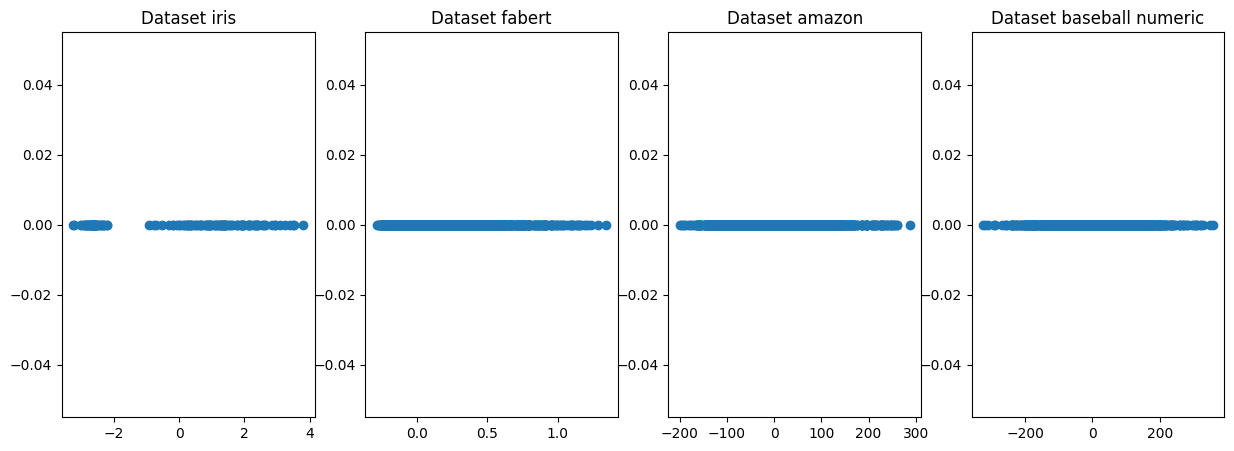

In [140]:
#plot 1d in one plot

plot_datasets = [filtered_iris_frame, filtered_fabert_frame, filtered_Amazon_frame , baseball_numeric_frame_dowloaded]
data = {"dataset": ["iris", "fabert", "amazon", "baseball numeric"], "absolute variance": [], "relative variance": []}
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
cord = 0
for dataset in plot_datasets:
    resized_matrix, variance,relative_variance = PCA(dataset, 1)
    axs[cord].scatter(resized_matrix, np.zeros(len(resized_matrix)))
    axs[cord].set_title("Dataset " + data["dataset"][cord])
    data["absolute variance"].append(variance)
    data["relative variance"].append(relative_variance)
    cord += 1

data_frame = pd.DataFrame(data)
print(data_frame)


C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


            dataset  absolute variance  relative variance
0              iris           4.467084           0.977632
1            fabert           0.046585           0.016717
2            amazon        7745.114891           0.573548
3  baseball numeric       17228.155686           0.989389


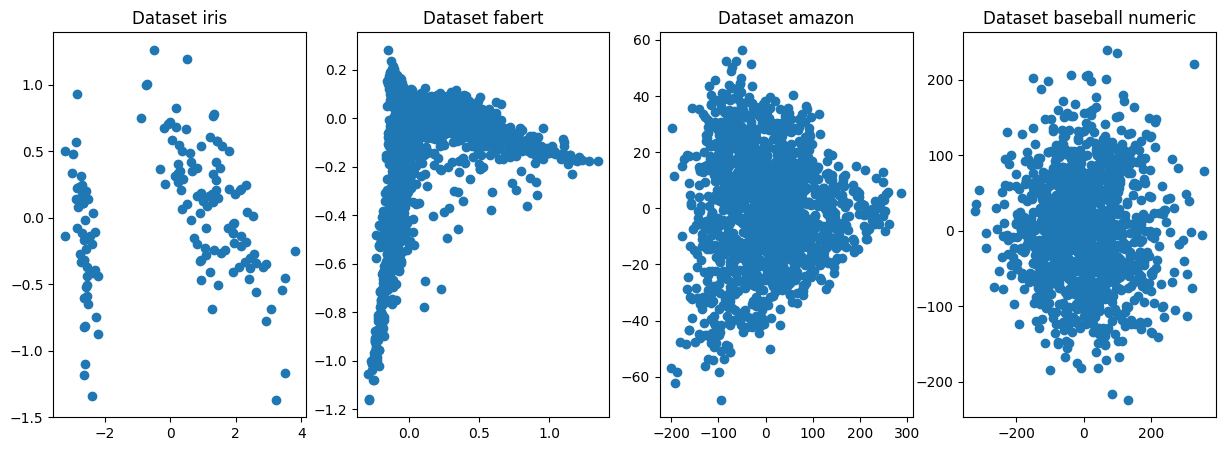

In [141]:
# plot 2d in one plot

data = {"dataset": ["iris", "fabert", "amazon", "baseball numeric"], "absolute variance": [], "relative variance": []}
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
cord = 0
for dataset in plot_datasets:
    resized_matrix, variance,relative_variance = PCA(dataset, 2)
    axs[cord].scatter(resized_matrix[:, 0], resized_matrix[:, 1])
    axs[cord].set_title("Dataset " + data["dataset"][cord])
    data["absolute variance"].append(variance)
    data["relative variance"].append(relative_variance)
    cord += 1

data_frame = pd.DataFrame(data)
print(data_frame)

            dataset  absolute variance  relative variance
0              iris           4.545608           0.994817
1            fabert           0.064043           0.022982
2  baseball numeric       17391.760998           0.998785


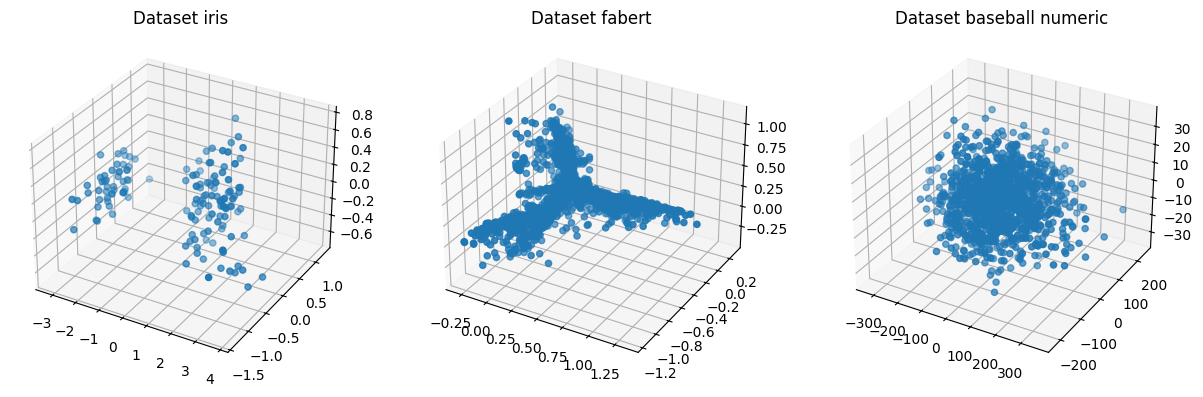

In [142]:
# plot 3d
from mpl_toolkits.mplot3d import Axes3D

plot_datasets_2 = [filtered_iris_frame, filtered_fabert_frame, baseball_numeric_frame_dowloaded]
fi, ax = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': '3d'})
data = {"dataset": ["iris", "fabert", "baseball numeric"], "absolute variance": [], "relative variance": []}
cord = 0
for dataset in plot_datasets_2:
    resized_matrix, variance,relative_variance = PCA(dataset, 3)
    ax[cord].scatter(resized_matrix[:, 0], resized_matrix[:, 1], resized_matrix[:, 2])
    ax[cord].set_title("Dataset " + data["dataset"][cord])
    data["absolute variance"].append(variance)
    data["relative variance"].append(relative_variance)
    cord += 1

data_frame = pd.DataFrame(data)
print(data_frame)



In [143]:
# 3d plot for amazon dataset

resized_matrix, variance,relative_variance = PCA(filtered_Amazon_frame, 3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(resized_matrix[:, 0], resized_matrix[:, 1], resized_matrix[:, 2])
ax.set_title("Dataset Amazon")
plt.show()

C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\collections.py:558: Compl

ValueError: Invalid RGBA argument: masked_array(data=[0.12156863+0.j, 0.46666667+0.j, 0.70588235+0.j,
                   0.3       +0.j],
             mask=False,
       fill_value=(1e+20+0j))

<Figure size 640x480 with 1 Axes>